In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image

/home/burakov/anaconda3/envs/cv36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/burakov/anaconda3/envs/cv36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/burakov/anaconda3/envs/cv36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/burakov/anaconda3/envs/cv36/lib/python3.6/s

In [5]:
dir_path = '/home/burakov/Alpha/Data/nyu_depth_v2/nyu_depth_v2_labeled_vis/train/basement'
file_name_base = '00489'
image_name = f'rgb_{file_name_base}.jpg'
depth_name = f'sync_depth_{file_name_base}.png'
image_path = os.path.join(dir_path, image_name)
depth_path = os.path.join(dir_path, depth_name)

In [6]:
depth = Image.open(depth_path)
d = np.asarray(depth)
depth.format, depth.mode, depth.size, d.dtype, d.shape, d.min(), d.max(), d.mean()

('PNG',
 'I',
 (640, 480),
 dtype('int32'),
 (480, 640),
 0,
 6483,
 2641.0538053385417)

In [7]:
graph = tf.Graph()
with graph.as_default():
    image_tensor = tf.image.decode_jpeg(tf.read_file(image_path))
    depth_tensor = tf.image.decode_png(tf.read_file(depth_path),
                                       channels=0, dtype=tf.uint16)
    depth_tensor = tf.cast(depth_tensor, tf.float32) / 1000

In [8]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(graph=graph, config=config) as sess:
    sess.run(tf.global_variables_initializer())
    image = sess.run(image_tensor)
    depth = sess.run(depth_tensor)

In [9]:
print(image.shape, image.dtype, image.min(), image.max())
print(depth.shape, depth.dtype, depth.min(), depth.max(), depth.mean())

(480, 640, 3) uint8 0 255
(480, 640, 1) float32 0.0 6.4830003 2.641054


In [10]:
dir_path = '/media/burakov/Data1/Data/Arrival/CORNER_NODE_LH_1000093_E_CORNER_NODE_RH_1000094_D_on_agv_000500/cam_100/'
num = '0000000_1574367512'
image_name = f'cam_100_img_{num}.png'
depth_name = f'cam_100_depth_map_{num}.ext'
image_path = os.path.join(dir_path, image_name)
depth_path = os.path.join(dir_path, depth_name)

In [19]:
graph1 = tf.Graph()
with graph1.as_default():
    image_tensor = tf.image.decode_png(tf.read_file(image_path))
    depth_tensor = tf.io.decode_raw(tf.read_file(depth_path), tf.float32)
    depth_tensor = tf.cast(depth_tensor, tf.float32) / 100
    depth_tensor = tf.reshape(depth_tensor, (2048, 3072))

In [20]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(graph=graph1, config=config) as sess:
    sess.run(tf.global_variables_initializer())
    image = sess.run(image_tensor)
    depth = sess.run(depth_tensor)

In [21]:
print(image.shape, image.dtype, image.min(), image.max())
print(depth.shape, depth.dtype, depth.min(), depth.max(), depth.mean())

(2048, 3072, 3) uint8 0 255
(2048, 3072) float32 1.6949999 655.04 3.9308074


In [14]:
2048*3072

6291456

In [25]:
dd = np.reshape(depth, (-1,))
dd.shape

(6291456,)

(array([5.737773e+06, 5.357990e+05, 1.781300e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

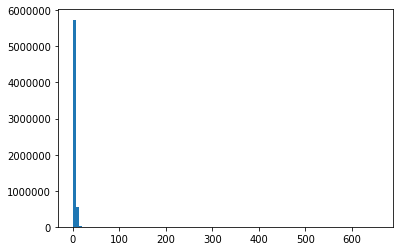

In [29]:
plt.hist(dd, bins=100)

In [30]:
print(dd[dd > 640])

[655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04 655.04
 655.04]


In [34]:
np.sum(dd > 640)

71

In [35]:
np.sum(dd < 20)

6291385

In [36]:
np.sum(dd < 15)

6287843

In [39]:
np.argwhere(depth > 640)

array([[  12,  854],
       [  27,  999],
       [  28, 1009],
       [  29, 1019],
       [  31, 1038],
       [  32, 1048],
       [  34, 1067],
       [  61, 1882],
       [  67, 1881],
       [  73, 1880],
       [  79, 1879],
       [  85, 1878],
       [  91, 1877],
       [  97, 1876],
       [ 140, 1869],
       [ 146, 1868],
       [ 152, 1867],
       [ 158, 1866],
       [ 164, 1865],
       [ 170, 1864],
       [ 213, 1857],
       [ 219, 1856],
       [ 225, 1855],
       [ 231, 1854],
       [ 357, 1016],
       [ 357, 1017],
       [ 357, 1018],
       [ 358, 1022],
       [ 358, 1023],
       [ 358, 1024],
       [ 358, 1025],
       [ 358, 1026],
       [ 358, 1027],
       [ 358, 1028],
       [ 358, 1029],
       [ 359, 1034],
       [ 359, 1035],
       [ 359, 1036],
       [ 359, 1037],
       [ 359, 1038],
       [ 359, 1039],
       [ 359, 1040],
       [ 360, 1045],
       [ 360, 1046],
       [ 360, 1047],
       [ 360, 1048],
       [ 360, 1049],
       [ 360,